# Задание 1

В данном задание надо будет реализовать функцию потерь и алгоритм субградиентного спуска для прямой задачи SVM

Подсказка 1. Функция потерь для алгоритма SVC имеет следующий вид:
$$\mathcal{L} = \sum_{i=1}^l \underbrace{{\left(1 - M_i\right)}_{+}}_\text{hinge loss} + \underbrace{\frac{\lambda}{2}||w||^2}_\text{regularizer} \rightarrow \min_{w,w_0}$$

Подсказка 2. Градиентный спуск. Чтобы найти минимум $\mathcal{L} (w)$, мы задаём некоторое начальное приближение $w_0$ для наших параметров и итеративно обновляем веса по форрмуле ниже до тех, пока они не перестанут меняться больше, чем на некоторую маленькую константу $\varepsilon$ :
$$ w_i := w_{i-1} - \alpha \cdot \nabla_w \mathcal{L}(w_{i-1}). $$

Подсказка 3. У производной hinge-функции имеется разрыв в точке $M_i = 1$. На практике, мы можем взять значение градиента как справа $(M_i > 1)$, так и слева $(M_i < 1)$. Это называется субградиентом функции данной точке. Возьмите значения субградиента справа.

Подсказка 4.  В лекции мы выделяли свободный член $w_0$ в качестве отдельного слагаемого. На практике все же удобнее ввести для него константный признак, как делалось в предыдущих лекициях. При этом не забывайте, что регуляризация не применяется к свободному коэффициенту 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

In [366]:
def svm_objective(w, X, y, C=.1):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    w (np.array): d -dimensional vector of parameters
    X (np.array): (l,d)-dimensional features matrix
    y (np.array): l-dimensional vector of targets
    """ 
    margins = 1 - y * np.dot(X, w)
    margins[margins < 0] = 0
    
    hinge_loss = C * np.mean(margins)
    cost = .5 * np.linalg.norm(w[:-1]) ** 2 + hinge_loss
    
    return cost

def gradient_desscent(X,y,threshold = 5e-4,alpha = 1e-3):
    """The gradient descent algorithm.
    
    Parameters:
    threshold: float, tolerance for stopping criterion.
    alpha: float, step_size of gradient descend
    
    Returns:
    w (np.array): optimal weights
    """
    
    w = np.random.normal(loc=0, scale=0.06, size=X.shape[1])
    
    prev_loss = float('inf')
    epochs = 10000
    batch_size = 32
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            m = y[i] * np.dot(X[i], w)
            
            if m >=1 :
                w = w - alpha * w / epochs
            else:
                w = w + alpha * (X[i] * y[i] - w / epochs)
            
        if (epoch + 1) % 500 == 0:
            loss = svm_objective(w, X, y)

            print(f"Loss: {loss}, Epoch: {epoch + 1}")

            if abs(prev_loss - loss) < threshold:
                return w

            prev_loss = loss
    return w

def predict(X,w):
    """Predictions of x from linear svc with given weights w.
    
    Parameters:
    w (np.array): d-dimensional vector of optimal parameters
    X (np.array): (l,d)-dimensional features matrix
    
    Returns:
    y_pred (np.array): svm predictions for weights w
    """
    
    preds = np.sign(np.dot(X, w))
    return preds

In [367]:
# Обучающая выборка
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target


iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]
iris_X['one'] = 1

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1


# remain 2 first features + constant feature
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

In [368]:
X_train.shape[1]

3

In [369]:
# Получим оптимальные веса с помощью реализованного алгоритма градиентного спуска
w_opt=gradient_desscent(X_train, y_train)

Loss: 4.213154081348995, Epoch: 500
Loss: 7.051077619644335, Epoch: 1000
Loss: 9.093064778052693, Epoch: 1500
Loss: 10.571438611482353, Epoch: 2000
Loss: 11.567552454071054, Epoch: 2500
Loss: 12.3027270152938, Epoch: 3000
Loss: 13.059108448042403, Epoch: 3500
Loss: 13.836655174524651, Epoch: 4000
Loss: 14.63518478012081, Epoch: 4500
Loss: 15.45457223100656, Epoch: 5000
Loss: 16.29469305339631, Epoch: 5500
Loss: 17.155423333064824, Epoch: 6000
Loss: 17.98794777286936, Epoch: 6500
Loss: 18.803291528126422, Epoch: 7000
Loss: 19.517399642620116, Epoch: 7500
Loss: 19.51076527784978, Epoch: 8000
Loss: 19.525981340203966, Epoch: 8500
Loss: 19.519355166778418, Epoch: 9000
Loss: 19.534590571229796, Epoch: 9500
Loss: 19.527974971167414, Epoch: 10000


[ 1.  1.  1. ... -1. -1. -1.]


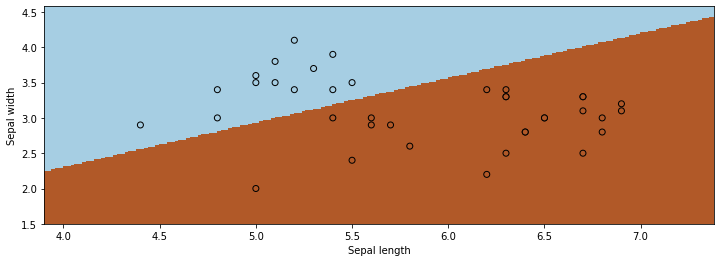

In [370]:
# Убедимся визуально, что разделяющая гиперплоскость лежит на одинаковом расстоянии от обоих классов
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = predict(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)],w_opt)

print(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

In [372]:
# Проверим, что ближайшие точки лежат на одинаковом расстоянии от разделяющей прямой

np.round(X_train.dot(w_opt)[X_train.dot(w_opt)>0].min(),2) == np.round(X_train.dot(w_opt)[X_train.dot(w_opt)<=0].max()*(-1),2)

True

# Задание 2

В этом задании вам предстоит попридумывать ядра, с помощью которых можно решить задачу бинарной классификации

In [374]:
def plot_dataset(x1,y,x2=None):
    """Visualization of tasks datasets
    
    Parameters:
    x1 (np.array):  vector of features
    y (np.array): 1-dimensional vector of targets
    x2 (np.array): second component of vector of features if data is two-dimentional
    """
    
    if x2 is None:
        x2 = np.zeros(len(x1))
    
    fig,ax = plt.subplots(1,1,figsize=(8,8))
    plt.scatter(x1[y==1], x2[y==1], marker='+',c='red',s=400)
    plt.scatter(x1[y==-1], x2[y==-1], marker='_',c='blue',s=400)
    ax.get_yaxis().set_visible(False)

In [419]:
def plot_svc_kernels(X,Y,clf):
    clf.fit(X, Y)
    print(clf.support_vectors_)
    # plot the line, the points, and the nearest vectors to the plane
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    XX, YY = np.mgrid[X_MIN:X_MAX:200j, Y_MIN:Y_MAX:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-1, 0, 1])

## Задание 2.1 Можно ли придумать такое одномерное преобразование (ядро), что выборка будет линейно-разделима? 

Если да, то реализуйте метод Kernel, который обеспечивает линейную-разделимость. 

Если нет, то напишите в ячейке, почему это невозможно

In [375]:
dataset1 = pd.DataFrame({'x' : range(0,7),'y' : [1,1,-1,-1,-1,1,1]})

In [381]:
dataset1.shape

(7, 2)

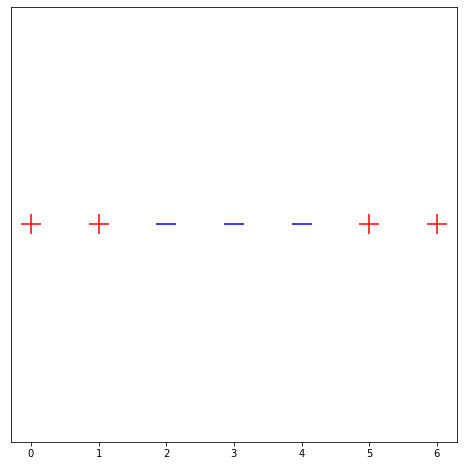

In [376]:
plot_dataset(dataset1.x,dataset1.y)

In [378]:
def kernel(X1, X2):
    magnitude = np.linalg.norm(X1 - X2)
    return np.exp(-1 * magnitude ** 2)

In [379]:
from sklearn import svm
clf = svm.SVC(kernel=kernel)

In [380]:
plot_svc_kernels(dataset1.x, dataset1.y, clf)

IndexError: tuple index out of range

## Задание 2.2 Можно ли придумать такое одномерное преобразование (ядро), что выборка будет линейно-разделима? 

Если да, то реализуйте метод Kernel, который обеспечивает линейную-разделимость. 

Если нет, то напишите в ячейке, почему это невозможно

In [ ]:
dataset2 = pd.DataFrame({'x' : range(0,8),'y' : [1,-1,1,-1,1,-1,1,-1]})

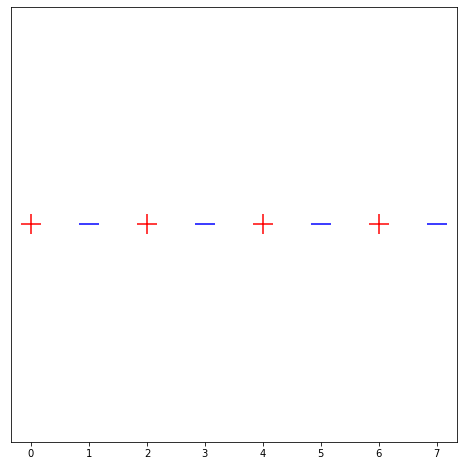

In [ ]:
plot_dataset(dataset2.x,dataset2.y)

In [ ]:
def kernel(X1, X2):
    # ===================== YOUR CODE HERE ======================

    
    
    # =============================================================
    return 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel=kernel)

## Задание 2.3 Можно ли придумать такое преобразование (ядро), что выборка будет линейно-разделима?
Если да, то реализуйте метод Kernel, который обеспечивает линейную-разделимость.

Если нет, то напишите в ячейке, почему это невозможно

In [382]:
dataset3 = pd.DataFrame({'x1': [0.0,0.95,0.59,-0.59,-0.95,0.0,1,1.73,2.0,1.73,1,0,-1,-1.73,-2.0,-1.73,-1.0],
                         'x2': [1.0,0.31,-0.81,-0.81, 0.31, 2.0,1.73,1.0,0,-1,-1.73,-2.0,-1.73,-1.0,0,1.0,1.73],
                          'y' : [1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})

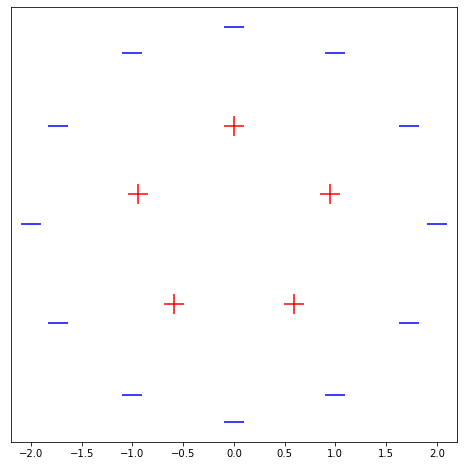

In [383]:
plot_dataset(dataset3.x1,dataset3.y,dataset3.x2)

In [421]:
def kernel(X1, X2):
    norm1 = np.sum(X1 ** 2)
    norm2 = np.sum(X2 ** 2)
    return np.exp(-1 * (norm1 + norm2 - 2 * np.dot(X1, X2.T)) ** 2)

In [422]:
from sklearn import svm
clf = svm.SVC(kernel=kernel)

In [423]:
train = dataset3[['x1', 'x2']].to_numpy()
labels = dataset3.y.to_numpy()

In [424]:
plot_svc_kernels(train, labels, clf)

[]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [427]:
kernel(train[:,0], train[:, 1])

0.0

## Задание 2.4 Можно ли придумать такое преобразование (ядро), что выборка будет линейно-разделима?
Если да, то реализуйте метод Kernel, который обеспечивает линейную-разделимость.

Если нет, то напишите в ячейке, почему это невозможно

In [ ]:
dataset4 = pd.DataFrame({'x1': [0.0,0.95,0.59,-0.59,-0.95,0.0,1,1.73,2.0,1.73,1,0,-1,-1.73,-2.0,-1.73,-1.0,0.,0.93,1.76,
                                2.43,2.85,3.,2.85,2.43,1.76,0.93,0.,-0.93,-1.76,-2.43,-2.85,-3.,-2.85,-2.43,-1.76,-0.93],
                         'x2': [1.0,0.31,-0.81,-0.81, 0.31, 2.0,1.73,1.0,0,-1,-1.73,-2.0,-1.73,-1.0,0,1.0,1.73,3.,2.85,2.43,
                                1.76,0.93,0.,-0.93,-1.76,-2.43,-2.85,-3.,-2.85,-2.43,-1.76,-0.93,-0.,0.93,1.76,2.43,2.85],
                          'y' : [1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]})

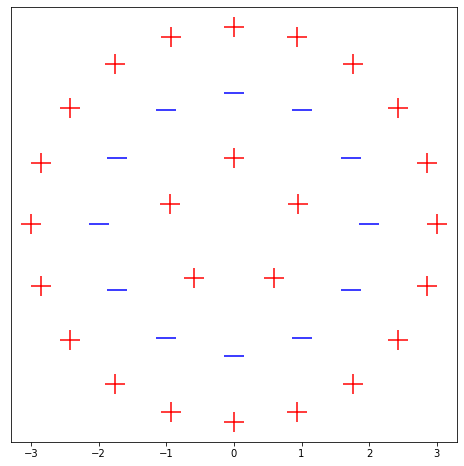

In [ ]:
plot_dataset(dataset4.x1,dataset4.y,dataset4.x2)

In [ ]:
def kernel(X1, X2):
    # ===================== YOUR CODE HERE ======================

    
    
    # =============================================================
    return 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel=kernel)

# Задание 3

Довольно часто нам помимо самих ответов, важно уметь оценить вероятности этих ответов. Например,
в задаче кредитного скоринга вероятность нужна для оценки метрики VaR (Value at Risk), в задачах продвижения - для оценки доходности. Поэтому очень важно уметь оценивать качество выдаваемых алгоритмами вероятностей, и если качество плохое - то исправлять это, "калибровать" алгоритм.

Калиброванный классификатор - это классификатор, для которого справедливо: Если $ \hat{p}$ - предсказанная вероятность класса 1, то $P(y_i=1|a(x_i)=\hat{p}) = \hat{p}$. Другими словами,  мы предсказываем корректную вероятность класса 1, если прогноз «объект $x_i$ принадлежит классу 1 с вероятностью $\frac{2}{3}$» должен сбываться в $\frac{2}{3}$ случаев. 

Как визуально оценить калиброванность классификатора? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной.

In [634]:
def plot_calibration_curve(y_test, preds, n_bins = 10):
    """calibration curve plotting.
    
    Parameters:
    y_test (np.array): target
    preds (np.array): probabilities of classifier
    n_bins int: number of bins in historgramm
    
    Returns:
    bin_middle_points (np.array): ideal calibrated probalities
    bin_real_ratios (np.array): actual calibrated probalities
    """
    bin_middle_points = []
    bin_real_ratios = []
    
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l+(r-l) / 2.) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] ))
        
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios, label = 'actual calibration')
    plt.plot(bin_middle_points, bin_middle_points, linestyle='--',label = 'perfect calibration')
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.legend()
    return bin_middle_points, bin_real_ratios

In [864]:
# обучающая выборка
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=800, n_features=10, n_informative=2, n_redundant=8,
    random_state=42,flip_y = 0.1)

## Задание 3.1

Разбейте исходную выборку на train и test. Обучите алгоритмы SVM и Логистической регрессии (воспользуйтесь библиотекой sklearn). Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы). Чем они различаются? Чем вы можете объяснить это?

In [865]:
from sklearn.model_selection import train_test_split

train, test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [866]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [867]:
svm = SVC(kernel='linear', probability=True).fit(train, y_train)
logreg = LogisticRegression().fit(train, y_train)

In [868]:
svm_preds = svm.predict_proba(test)
logreg_preds = logreg.predict_proba(test)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.021739130434782608,
  0.08823529411764706,
  0.08333333333333333,
  0.2727272727272727,
  0.25,
  0.4375,
  0.9166666666666666,
  1.0,
  0.9259259259259259,
  0.9607843137254902])

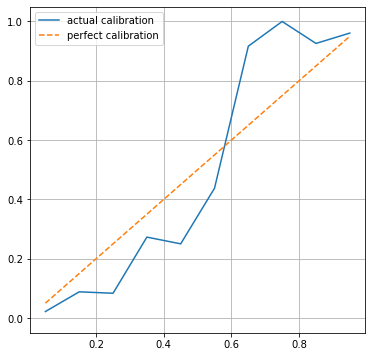

In [869]:
plot_calibration_curve(y_test, svm_preds[:, 1],10)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.02127659574468085,
  0.08108108108108109,
  0.1,
  0.2727272727272727,
  0.25,
  0.5384615384615384,
  0.9090909090909091,
  1.0,
  0.9259259259259259,
  0.9607843137254902])

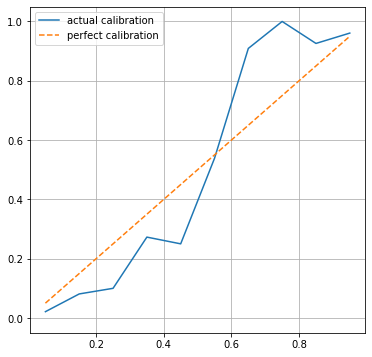

In [870]:
plot_calibration_curve(y_test, logreg_preds[:, 1],)

##  Задание 3.2 Реализуйте непараметрический метод гистограммной калибровки  (Histogram Binning)

Решается такая задача оптимизации по параметрам ${\theta_i}$:

$$\sum_{i=1}^k \sum_{b(x)\in B_i} (\theta_i - y_i)^2 \to min$$

$B_i$ - разбиение исходного интервала предсказаний $[0, 1]$ на несколько маленьких отрезков $i=1,\dotso,k$.

После реализации обучите её на ваших данных и проскорьте её на тестовой выборке. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов. и гистограммы распределения ответов классификаторов Что изменилось? Чем вы можете объяснить это?

Подсказка 1. Оптимальным констатнтным решением по методу наименьших квадратов является среднее значение таргета

Подсказка 2. Для правильной калибровки важно оценивать вероятность по тем объектам, которые ваш базовый классификатор еще не видел. Воспользуйтесь кросс-валидацией для того, чтобы сначала проскорить всю обучающую выборку базовым алгоритмом, а затем переоценить вероятности с помощью гистограмной калибровки

In [871]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [872]:
train, test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [873]:
svm = SVC(kernel='linear', probability=True)
logreg = LogisticRegression()

In [874]:
hist_calibrated_svm = CalibratedClassifierCV(base_estimator=svm,
                                    method='isotonic', 
                                    cv=5)

hist_calibrated_logreg = CalibratedClassifierCV(base_estimator=logreg,
                                    method='isotonic', 
                                    cv=5)

In [875]:
hist_calibrated_svm.fit(train, y_train)
hist_calibrated_logreg.fit(train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv=5,
                       method='isotonic')

In [876]:
logreg_hist_calibrated_preds = hist_calibrated_logreg.predict_proba(test)
svm_hist_calibrated_preds = hist_calibrated_svm.predict_proba(test)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.05084745762711865,
  0.06666666666666667,
  0.5,
  0.21428571428571427,
  0.3333333333333333,
  0.3333333333333333,
  0.75,
  0.8888888888888888,
  1.0,
  0.9436619718309859])

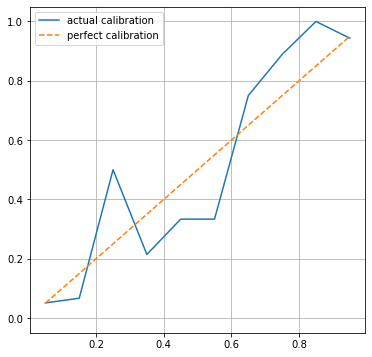

In [877]:
plot_calibration_curve(y_test, svm_hist_calibrated_preds[:, 1],10)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.04,
  0.10344827586206896,
  0.4,
  0.23076923076923078,
  0.3333333333333333,
  0.3333333333333333,
  0.75,
  0.9090909090909091,
  0.95,
  0.9436619718309859])

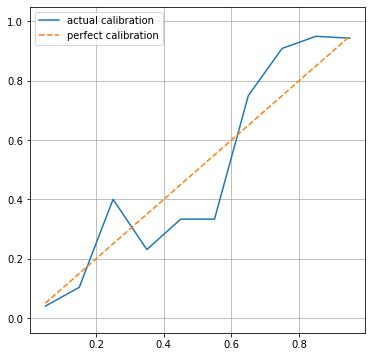

In [878]:
plot_calibration_curve(y_test, logreg_hist_calibrated_preds[:, 1],10)

## Задание 3.3

Реализуйте калибровку Платта. Она представляет собой по сути применение сигмоиды поверх другой модели. 

$${P(y_i=1|x_i) = \sigma(w \times a(x_i)+b) = \frac{1}{1+exp^{-w a(x_i)-b}}}$$

После реализации обучите её на ваших данных и проскорьте её на тестовой выборке. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов. и гистограммы распределения ответов классификаторов Что изменилось? Чем вы можете объяснить это?

Подсказка 1. Параметры $w$  и $b$ подбираются методом максимального правдоподобия на отложенной выборке. Нельзя использовать выборку, на которой обучался исходный алгоритм, для оптимизации параметров $w$ и $b$.

Подсказка 2. Воспользуйтесь кросс-валидацией для того, чтобы сначала проскорить всю обучающую выборку базовым алгоритмом, а затем обучить логистическую регрессию

In [879]:
svm = SVC(kernel='linear', probability=True)
logreg = LogisticRegression()

In [880]:
platt_calibrated_svm = CalibratedClassifierCV(base_estimator=svm,
                                    method='sigmoid', 
                                    cv=5)

platt_calibrated_logreg = CalibratedClassifierCV(base_estimator=logreg,
                                    method='sigmoid', 
                                    cv=5)

In [881]:
platt_calibrated_svm.fit(train, y_train)
platt_calibrated_logreg.fit(train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv=5)

In [882]:
logreg_platt_calibrated_preds = calibrated_logreg.predict_proba(test)
svm_platt_calibrated_preds = calibrated_svm.predict_proba(test)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.0,
  0.058823529411764705,
  0.03225806451612903,
  0.11764705882352941,
  0.4838709677419355,
  0.6956521739130435,
  0.3333333333333333,
  0.8507462686567164,
  0.0,
  nan])

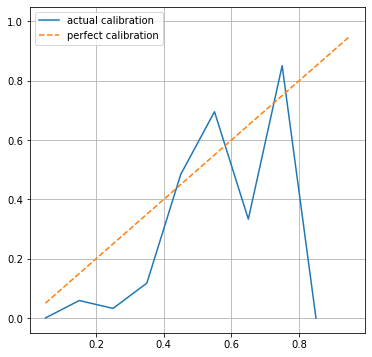

In [883]:
plot_calibration_curve(y_test, svm_platt_calibrated_preds[:, 1],10)

([0.05,
  0.15000000000000002,
  0.25,
  0.35000000000000003,
  0.45,
  0.55,
  0.6500000000000001,
  0.75,
  0.8500000000000001,
  0.95],
 [0.0,
  0.058823529411764705,
  0.03225806451612903,
  0.11764705882352941,
  0.4838709677419355,
  0.6956521739130435,
  0.3333333333333333,
  0.8507462686567164,
  0.0,
  nan])

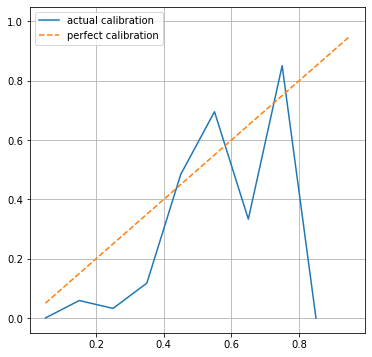

In [884]:
plot_calibration_curve(y_test, logreg_platt_calibrated_preds[:, 1],10)

## Задание 3.4. 

Метрики для оценки качества калибровки - negative log-likelihood (NLL) и Brier score (BS):

$$NLL = - \frac{1}{l} \sum_{i=1}^{l} y_i  log(a(x_i)) + (1-y_i)  (1-log(a(x_i))), \quad BS = \frac{1}{l} \sum_{i=1}^{l} (y_i - a(x_i))^2$$

Соберите слeдующую таблицу:



| Алгоритм | Brier loss | Log loss | Precision | Recall | F1 | Roc auc |
| --- | --- | --- | --- | --- | --- | --- |
| Logreg |
| SVM |
| Logreg + hist |
| Logreg + Platt |
| SVM + Platt |
| SVM + hist |

Как изменяются метрики при добавлении гистограмной калибровки? калибровки Плата? Почему так происходит? 

Для расчёта метрик можете воспользоваться стандартными реализациями из библиотеки sklearn

In [885]:
import pandas as pd
from sklearn.metrics import (brier_score_loss, 
                             log_loss,
                             precision_score, 
                             recall_score,
                             f1_score,
                             roc_auc_score)

In [886]:
data['Алгоритм'] = ['Logreg','SVM','Logreg + hist','Logreg + Platt','SVM + Platt','SVM + hist']

In [890]:
classifiers = [
        LogisticRegression(),
        SVC(kernel='linear', probability=True),
        CalibratedClassifierCV(base_estimator=LogisticRegression(),
                                    method='isotonic', 
                                    cv=5),
        CalibratedClassifierCV(base_estimator=LogisticRegression(),
                                    method='sigmoid', 
                                    cv=5),
        CalibratedClassifierCV(base_estimator=SVC(kernel='linear', probability=True),
                                    method='sigmoid', 
                                    cv=5),
        CalibratedClassifierCV(base_estimator=SVC(kernel='linear', probability=True),
                                    method='isotonic', 
                                    cv=5),
]

metrics = [brier_score_loss, log_loss, precision_score, recall_score, f1_score, roc_auc_score]

In [891]:
for i, classifier in enumerate(classifiers):
    classifier.fit(train, y_train)
    clf_probs = classifier.predict_proba(test)
    clf_preds = classifier.predict(test)
    
    metrics_scores = []
    
    for metric in [brier_score_loss, log_loss]:
        metrics_scores.append(metric(y_test, clf_probs[:, 1]))
        
    for metric in [precision_score, recall_score, f1_score, roc_auc_score]:
        metrics_scores.append(metric(y_test, clf_preds))
        
    data.iloc[i][1:] = metrics_scores

In [892]:
data

,Алгоритм,Brier Loss,Log Loss,Precision,Recall,F1,Roc auc
0,Logreg,0.0862762,0.302857,0.902655,0.894737,0.898678,0.903718
1,SVM,0.0870324,0.305245,0.872881,0.903509,0.887931,0.892231
2,Logreg + hist,0.0801693,0.286528,0.901786,0.885965,0.893805,0.899332
3,Logreg + Platt,0.0888145,0.311229,0.902655,0.894737,0.898678,0.903718
4,SVM + Platt,0.0887038,0.310862,0.902655,0.894737,0.898678,0.903718
5,SVM + hist,0.079732,0.284978,0.901786,0.885965,0.893805,0.899332


При добавлении гистограммного стабилизатора к SVM, Brier loss, как и Log loss, ожидаемо падают, ровно как и при применении стабилизатора Платта к логистической регрессии.